In [10]:
import yaml
import os

from agent import q_agent
from utils.dataprep import load_emb_gz, make_categories, load_emb

In [6]:
settings_file = "models/200818-182634-sharedexp.yaml"
dataset = "data/imagenet-27x80-vgg19.test-ctg.emb.gz"

In [7]:
with open(settings_file, "r") as f:
    experiment_args = yaml.safe_load(f)

In [8]:
path2ind, path_list, embeddings = load_emb_gz(dataset)
categories = make_categories(path_list)

DONE. 2193 items loaded from data/imagenet-27x80-vgg19.test-ctg.emb.gz.
27 categories found.


In [11]:
agent_args = {
    "input_shapes": [embeddings[0].shape] * experiment_args["n_active_images"] + [(1,)],
    "output_size": experiment_args["vocabulary_size"],
    "n_symbols": experiment_args["vocabulary_size"],
}

for k in ("sender_type", "n_informed_filters", "embedding_size", "learning_rate", "gibbs_temperature",
          "loss", "optimizer", "use_bias", "explore", "model_type"):
    if k in experiment_args:
        agent_args[k] = experiment_args[k]

agent1 = q_agent.MultiAgent(name="01", role="sender", **agent_args)
agent2 = q_agent.MultiAgent(name="02", role="receiver", **agent_args)

load_filename = os.path.join(experiment_args["model_dir"], experiment_args["load_file"])
agent1.load(f"{load_filename}.01")
agent2.load(f"{load_filename}.02")


In [15]:
a1name = agent1.get_active_name()
a2name = agent2.get_active_name()
print(f"sender: {a1name}")
print(f"receiver: {a2name}")
emb = {a1name: [], 
       a2name: []}

emb[a1name] = agent1.get_embedding(embeddings)
emb[a2name] = agent2.get_embedding(embeddings)


sender: 01.sender
receiver: 02.receiver


In [17]:
if experiment_args["roles"] == "switch":
    agent1.switch_role()
    agent2.switch_role()
    a1name = agent1.get_active_name()
    a2name = agent2.get_active_name()
    print(f"sender: {a1name}")
    print(f"receiver: {a2name}")
    
    emb[a1name] = agent1.get_embedding(embeddings)
    emb[a2name] = agent2.get_embedding(embeddings)

In [18]:
emb

{'01.sender': array([[-0.00800998, -0.00630384,  0.16348219, ...,  0.45991766,
         -0.09676115,  0.300898  ],
        [-0.00850619, -0.01095052,  0.16142036, ...,  0.44562367,
         -0.09183429,  0.28915387],
        [-0.00800797, -0.00630335,  0.16331543, ...,  0.4592862 ,
         -0.09655334,  0.300502  ],
        ...,
        [ 0.17674239,  0.01635341, -0.14107314, ...,  0.11348706,
          0.03303359,  0.01219218],
        [ 0.0829754 ,  0.07487287,  0.14421596, ..., -0.4254484 ,
         -0.06881212, -0.03433334],
        [ 0.09722958, -0.08386446,  0.14533971, ..., -0.14975804,
         -0.11768828,  0.04536255]], dtype=float32),
 '02.receiver': array([[-0.22930595, -0.05921593,  0.59103   , ..., -0.24934585,
          0.06300455,  0.37192962],
        [-0.22575521, -0.07291985,  0.5774261 , ..., -0.2387928 ,
          0.0715152 ,  0.36116117],
        [-0.2290113 , -0.05974257,  0.5904944 , ..., -0.24914093,
          0.06329675,  0.37156266],
        ...,
        [-0

## tSNE

In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

In [24]:
coords_2 = TSNE(n_components=2).fit_transform(emb['02.receiver'])

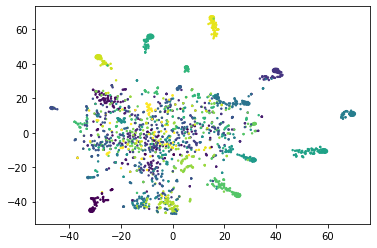

In [25]:
plt.scatter(*coords_2.T, c=categories, s=np.ones_like(categories)*2)